In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices thru One-hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

2024-09-25 12:47:55.723142: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 12:47:55.723355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 12:47:55.899847: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 12:47:56.336992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 12:48:00.473758: W tensorflow/compiler/tf2

170498071/170498071 [==============================] - 2s 0us/step


In [2]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(x_train.dtype)
print(x_train.ndim)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
float32
4


In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# First step - resize the Training and Test sets.

# Resize the training & test images using Tensorflow function
x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

# Convert the images back to numpy arrays
x_train_resized = x_train_resized.numpy()
x_test_resized = x_test_resized.numpy()

# One-hot encode labels
#y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)

2024-09-25 12:48:17.377741: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-25 12:48:18.023391: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-25 12:48:18.023772: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
print(x_train_resized.shape)
print(x_test_resized.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train_resized.dtype)
print(x_test_resized.dtype)
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

(50000, 64, 64, 3)
(10000, 64, 64, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
float32
float32
float32
float32
float32
float32


In [6]:
# DEFINE the new Model (with another layer - deeper)

input_shape = (64, 64, 3)

model_vgg = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.MaxPooling2D(pool_size=(2, 2)),                                      # Added Extra layer
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.MaxPooling2D(pool_size=(2, 2)),                                      # Added Extra layer
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),     #Dense increase to 128 from 100
        layers.Dense(10, activation="softmax"),
    ]
)

In [7]:

# COMPILE the Model

model_vgg.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 


 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 256)       590080    
          

In [8]:
# TRAIN the model with 10 epochs and batch size of 512

history2 = model_vgg.fit(x_train_resized, y_train, batch_size=512, epochs=50)

2024-09-25 12:49:14.060297: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2457600000 exceeds 10% of free system memory.
2024-09-25 12:49:18.485801: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2457600000 exceeds 10% of free system memory.


Epoch 1/50


2024-09-25 12:49:27.948494: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-25 12:49:36.569676: I external/local_xla/xla/service/service.cc:168] XLA service 0x30798330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-25 12:49:36.569760: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
I0000 00:00:1727268576.740617      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 [==============================] - 38s 160ms/step - loss: 2.2978 - accuracy: 0.1169
Epoch 2/50
98/98 [==============================] - 11s 112ms/step - loss: 2.2801 - accuracy: 0.1427
Epoch 3/50
98/98 [==============================] - 11s 110ms/step - loss: 2.1879 - accuracy: 0.2004
Epoch 4/50
98/98 [==============================] - 11s 112ms/step - loss: 2.0825 - accuracy: 0.2421
Epoch 5/50
98/98 [==============================] - 11s 111ms/step - loss: 2.0104 - accuracy: 0.2757
Epoch 6/50
98/98 [==============================] - 11s 113ms/step - loss: 1.9551 - accuracy: 0.3030
Epoch 7/50
98/98 [==============================] - 12s 118ms/step - loss: 1.8906 - accuracy: 0.3288
Epoch 8/50
98/98 [==============================] - 11s 113ms/step - loss: 1.8460 - accuracy: 0.3440
Epoch 9/50
98/98 [==============================] - 11s 113ms/step - loss: 1.7944 - accuracy: 0.3624
Epoch 10/50
98/98 [==============================] - 11s 113ms/step - loss: 1.7477 - accuracy: 0.3786


In [9]:
# Predicting the output for the test split
y_pred_vgg = model_vgg.predict(x_test_resized)

# use argmax function to findout which class has the highest probability
y_pred_vgg_classes = np.argmax(y_pred_vgg, axis=1)  # 10 classes of possible images
y_true_classes = np.argmax(y_test, axis=1)  # actual class


313/313 [==============================] - 2s 6ms/step


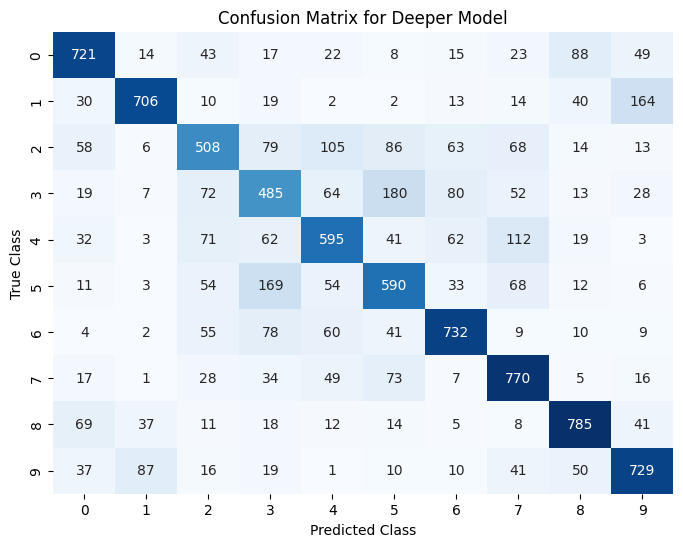

In [10]:
# Plot the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_vgg_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Deeper Model')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()